## Regression
> The main difference between **Regression** and **Classification** algorithms that **Regression** algorithms are used to predict the **continuous** values such as **price**, **salary**, **age**, etc. and **Classification** algorithms are used to predict/Classify the discrete values such as **Male or Female**, **True or False**, **Spam or Not Spam**, etc.

In [1]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

### Simple Regression Example using Support Vector Regression (SVR)

In [3]:
from sklearn.svm import SVR

In [4]:
X = np.array([[0,0], [2,2], [4, 4], [9,9], [20, 20]])
y = np.array([0, 2, 4, 9, 20])

In [5]:
model = SVR()
model.fit(X, y)

SVR()

In [6]:
model.predict(np.array([[2,2]]))

array([3.49701406])

In [7]:
model.score(X, y)

0.14982203967374197

### Simple Regression Example using LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
model.predict(np.array([[2, 2], [0, 1], [10, 10]]))

array([ 2. ,  0.5, 10. ])

In [11]:
model.score(X, y)

1.0

> **Conclusion**: On linear data `LinearRegression` is the best algorithim for marking predictions

In [12]:
x_1, x_2 = [], []
for i in X:
    x_1.append(i[0])
    x_2.append(i[1])
x_1, x_2

([0, 2, 4, 9, 20], [0, 2, 4, 9, 20])

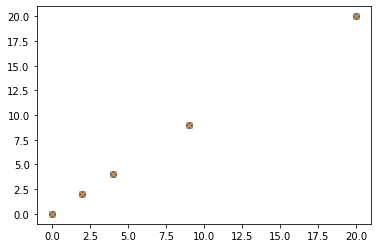

In [13]:
plt.scatter(x_1, y)
plt.scatter(x_2, y, marker='x')
plt.show()

### Iris Dataset
The different flowers has three different categories and 4 featueres which are:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
We want to predict the **petal width** of the flower Iris-Setosa given, **(sepal_length, sepal_width, petal_len)**

In [144]:
# According to the descpr the first 50 flowers are iris_setosa
iris = datasets.load_iris()
iris_setosa = iris.data[:50]

In [146]:
iris_setosa_dataFrame = pd.DataFrame(iris_setosa)
iris_setosa_dataFrame.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


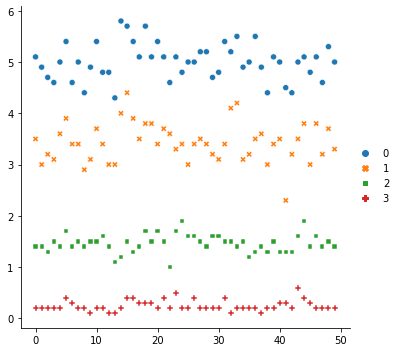

In [147]:
sns.relplot(data = iris_setosa_dataFrame)
plt.show()

### Splitting data into train and test

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X, y = [], []

for feature in iris_setosa:
    X.append(list(feature[:3]))
    y.append(feature[-1])
    
X[:2], y[:2]

([[5.1, 3.5, 1.4], [4.9, 3.0, 1.4]], [0.2, 0.2])

In [150]:
X = np.array(X)
y = np.array(y)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .1, random_state=33)
X_train.shape, y_train.shape, X_test.shape, 

((45, 3), (45,), (5, 3))

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [153]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Predictions using Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression

In [157]:
l_mod = LinearRegression()
l_mod.fit(X_train, y_train)

LinearRegression()

In [156]:
X_train[0], y_train[0]

(array([-0.52096765, -1.08655837, -0.34163533]), 0.3)

In [26]:
l_mod.predict([[-0.52096765, -1.08655837, -0.34163533]])

array([0.22341918])

In [158]:
print(l_mod.predict(X_test))
print(y_test)

[0.30018067 0.25745678 0.23071922 0.28104273 0.21719275]
[0.4 0.2 0.1 0.4 0.3]


In [159]:
l_mod.score(X_train, y_train)

0.1185275147409538

In [160]:
from sklearn.metrics import f1_score


### Predictions using Support Vector Regression

In [161]:
from sklearn.svm import SVR

In [162]:
svm_mod = SVR()
svm_mod.fit(X_train, y_train)

SVR()

In [163]:
svm_mod.score(X_train, y_train)

0.36868764406520393

In [164]:
svm_mod.predict([X_train[0]])

array([0.19985105])

## LogisticRegression
> So we use Logistic Regression when our independent variable is categorical, for example male(1) or female(0).

#### Types of Logistic Regression:
1. **Binary Logistic Regression**
    * Only two possible outcomes(Category). Example: The person will buy a car or not.

2. **Multinomial Logistic Regression**
    * More than two Categories possible without ordering.

3. **Ordinal Logistic Regression**
    * More than two Categories possible with ordering

## The Social_Network_Ads dataset and LogisticRegression
> Let's try to predict if a person will by a car or not using `Social_Network_Ads.csv` file downloaded

In [165]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


> Let's assume that `1` means buying a car and `0` means not buying. In this case our dependent variable is `Purchased` and our independent variables are `gender, age, estimated salary`

> So we may want to convert gender quantitative data, which means male can be represended by 1 and 0 otherwise

In [166]:

data["Gender"] = data['Gender'].replace('Male', 1)
data["Gender"] = data['Gender'].replace('Female', 0)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [323]:
X = data.iloc[:, 1:4].values
y = data.iloc[:, 4].values

In [324]:
X_balanced = data.iloc[:, 1:4].values
y_balanced = data.iloc[:, 4].values

## We buying sample to be equal to not buying sample
> This data `allPeople` will be used after evaluating the model at the end of testing the model without balanced cases

In [325]:
f =0;
m = 0
for x in X_balanced:
    if x[0] == 1:
        m +=1
    else:
        f +=1
f, m

(204, 196)

In [326]:
cars_count = list(y_balanced).count(1)
cars_count, list(y_balanced).count(0)

(143, 257)

> 143 people with cars and 257 people without cars

In [327]:
data_balanced = []
for x, y in zip(X_balanced, y_balanced):
    data_balanced.append([x, y])

In [328]:
cars =[]
nocars = []
for data__ in data_balanced:
    x, y = data__
    if y == 1:
        cars.append(data__)
    else:
        nocars.append(data__)
    
nocars = nocars[:cars_count]
cars = cars[:cars_count]

len(nocars), len(cars)

(143, 143)

In [329]:
nocars[:3]

[[array([    1,    19, 19000], dtype=int64), 0],
 [array([    1,    35, 20000], dtype=int64), 0],
 [array([    0,    26, 43000], dtype=int64), 0]]

> Number of people with cars are now equal to number of people without cars.

In [330]:
allPeople = nocars + cars
len(allPeople)

286

In [361]:
from random import shuffle
shuffle(allPeople)

In [362]:
len(allPeople), len(y_balanced)

(286, 400)

In [363]:
allPeople[:5]

[[array([    0,    28, 44000], dtype=int64), 0],
 [array([    0,    52, 38000], dtype=int64), 1],
 [array([    1,    19, 76000], dtype=int64), 0],
 [array([    1,    35, 50000], dtype=int64), 0],
 [array([     0,     60, 108000], dtype=int64), 1]]

### Getting X and y Data for balanced sets

In [373]:
X_balanced_data = []
y_balanced_data = []
for i, j in allPeople:
    X_balanced_data.append(i)
    y_balanced_data.append(j)

len(X_balanced_data), len(X_balanced_data), y_balanced_data[0], X_balanced_data[0]

(286, 286, 0, array([    0,    28, 44000], dtype=int64))

### Predicting with unbalances data

In [344]:
len(X), len(y_balanced)

(400, 400)

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y_balanced, random_state=29, test_size=.2)

In [348]:
X_train_sclaled = scaler.fit_transform(X_train)
X_test_sclaled = scaler.transform(X_test)

In [349]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [350]:
model = LogisticRegression(random_state=0)

In [351]:
model.fit(X_train_sclaled, y_train)

LogisticRegression(random_state=0)

In [352]:
X_data_test = scaler.transform([[46, 41000,1]])

In [353]:
model.predict(X_data_test)

array([1], dtype=int64)

In [354]:
for _data, _y in  list(zip(X_test_sclaled, y_test))[:10]:
    print(model.predict([_data])[0],"------->",  _y)

0 -------> 0
0 -------> 0
0 -------> 1
0 -------> 0
0 -------> 1
0 -------> 0
1 -------> 1
0 -------> 1
1 -------> 1
0 -------> 0


### Perfomance

In [355]:
model.score(X_train_sclaled, y_train)

0.853125

> The **model** is `85%` accurate on the train data.

In [356]:
model.score(X_test_sclaled, y_test)

0.7875

> The model is `79%` accurate on the tests data. Which is very reasonable!!

In [357]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train_sclaled)
acc = accuracy_score(y_train, y_train_pred)
acc

0.853125

In [358]:
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test_sclaled)
acc = accuracy_score(y_test, y_test_pred)
acc

0.7875

In [359]:
from sklearn.metrics import f1_score
f1_score(y_test, model.predict(X_test_sclaled), 
         average=None, labels=[0,  1])

array([0.85714286, 0.58536585])

### Predicting After Data has been balanced

> The model is more biased It's predicting the data more accurate on not buying a car:

> **One way to solve this is to use equal number of females and males in the train and test**

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [378]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced_data, y_balanced_data, random_state=29, test_size=.2)

In [379]:
X_train_sclaled_balanced = scaler.fit_transform(X_train_balanced)
X_test_sclaled_balanced = scaler.transform(X_test_balanced)

In [380]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [381]:
model = LogisticRegression(random_state=0)

In [382]:
model.fit(X_train_sclaled_balanced, y_train_balanced)

LogisticRegression(random_state=0)

In [383]:
X_data_test_balanced = scaler.transform([[46, 41000,1]])

In [384]:
model.predict(X_data_test_balanced)

array([1], dtype=int64)

In [385]:
for _data, _y in  list(zip(X_test_sclaled_balanced, y_test_balanced))[:10]:
    print(model.predict([_data])[0],"------->",  _y)

0 -------> 0
0 -------> 0
1 -------> 0
0 -------> 0
0 -------> 0
0 -------> 0
0 -------> 0
0 -------> 0
1 -------> 1
1 -------> 1


### Perfomance

In [386]:
model.score(X_train_sclaled_balanced, y_train_balanced)

0.9298245614035088

> The **model** is now `93%` accurate on the train set. We can further imporove the model by balancing the gender

In [387]:
model.score(X_test_sclaled_balanced, y_test_balanced)

0.896551724137931

> The **model** is now `90%` accurate on the test set. We can improve the model by balancing the gender.

In [390]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train_sclaled_balanced)
acc = accuracy_score(y_train_balanced, y_train_pred)
acc

0.9298245614035088

In [391]:
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test_sclaled_balanced)
acc = accuracy_score(y_test_balanced, y_test_pred)
acc

0.896551724137931

In [392]:
from sklearn.metrics import f1_score
f1_score(y_test_balanced, model.predict(X_test_sclaled_balanced), 
         average=None, labels=[0,  1])

array([0.9       , 0.89285714])

> A lit bit better now

> Done